In [1]:
import json
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.decomposition
import sklearn.preprocessing
import sklearn.manifold
from sklearn.model_selection import StratifiedKFold

os.chdir(os.path.dirname(os.getcwd()))

import src

portcalls = pd.read_pickle('data/portcalls_v3.pkl')
X, y, s = src.get_Xys(numpy=False)
ys = y + 3*s

skf = StratifiedKFold(shuffle=True, random_state=42)
fold = pd.Series({i: fold_i for fold_i, (train, test) in enumerate(skf.split(X=X, y=ys)) for i in test}).sort_index().values

# PCA

In [2]:
X_transformed = sklearn.preprocessing.StandardScaler().fit_transform(X.values)
pca = sklearn.decomposition.PCA(whiten=True)
X_transformed = pca.fit_transform(X.values)

In [3]:
pd.Series(pca.explained_variance_ratio_)

0      9.999739e-01
1      8.694771e-06
2      2.138260e-06
3      1.946718e-06
4      1.400069e-06
           ...     
498    8.983270e-33
499    8.983270e-33
500    8.983270e-33
501    8.983270e-33
502    8.242980e-36
Length: 503, dtype: float64

# T-SNE

In [4]:
tsne = sklearn.manifold.TSNE(n_jobs=100, learning_rate='auto', init='random')
X_tsne = tsne.fit_transform(X.values)

/data/bruingjde/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


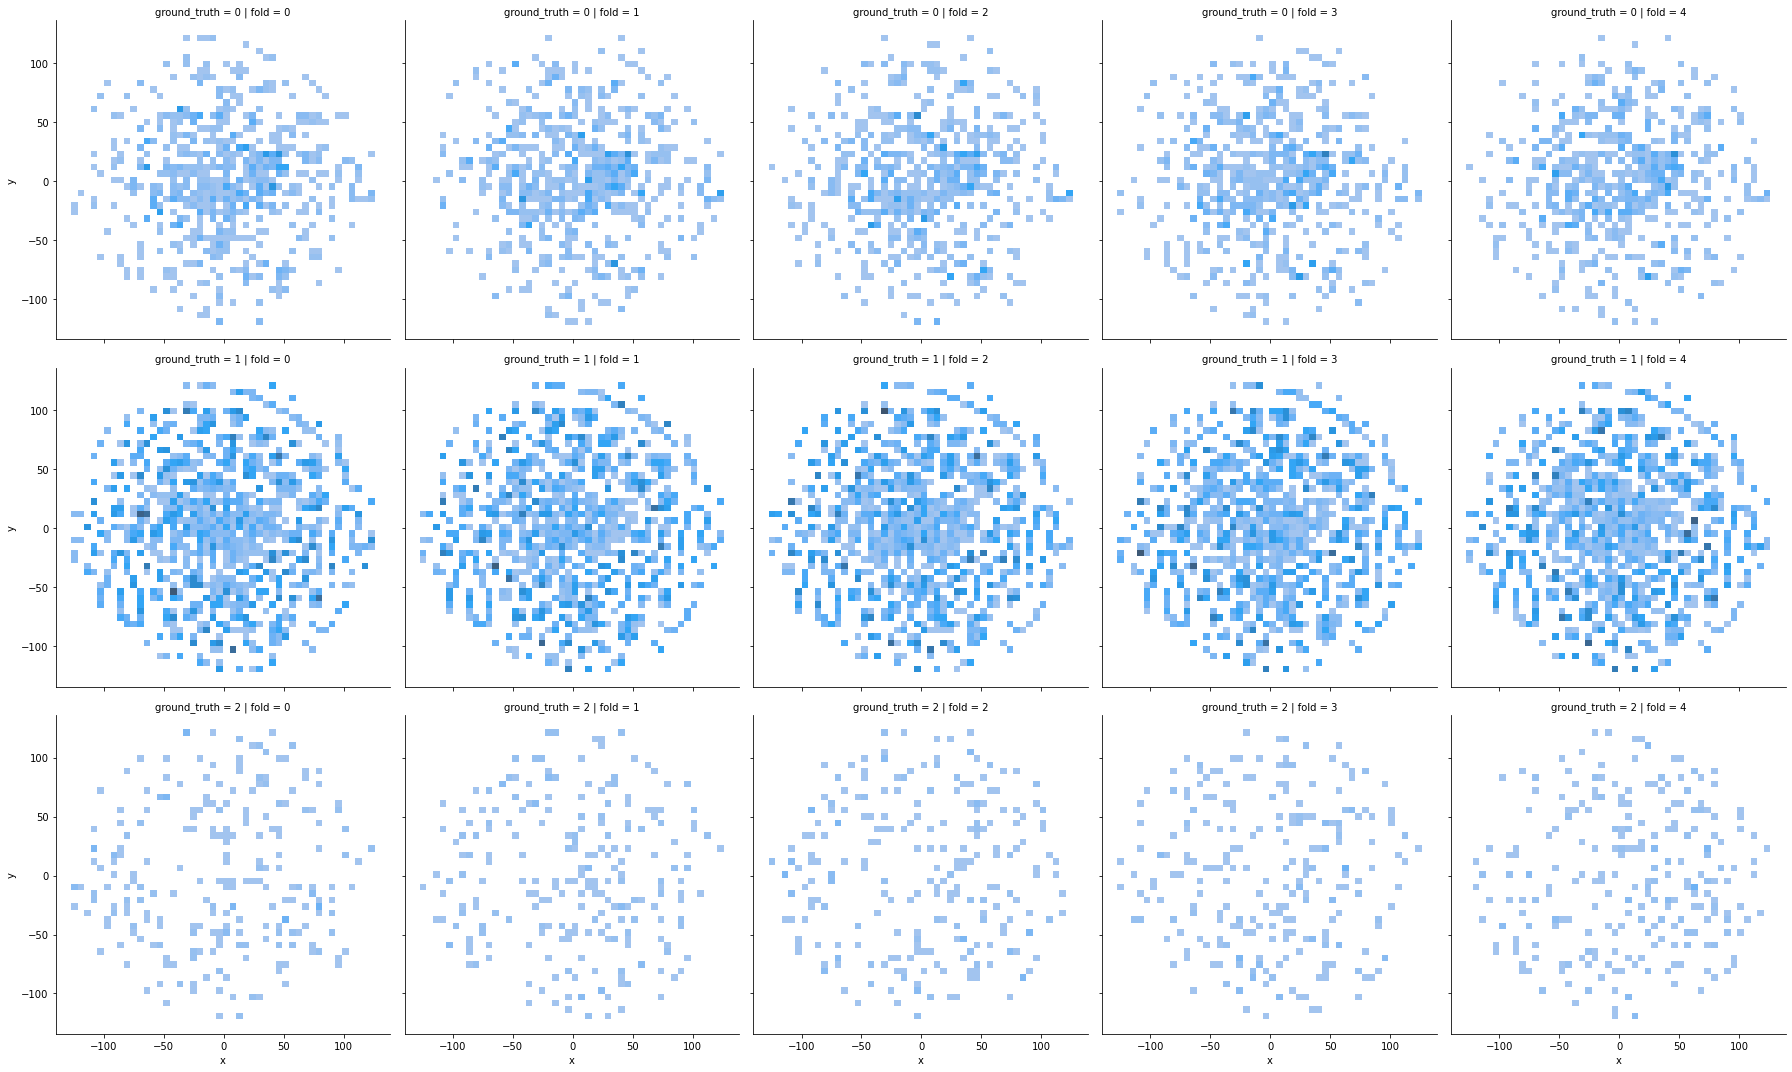

In [5]:
data = dict(x=X_tsne[:,0], y=X_tsne[:,1], fold=fold, ground_truth=y.values)
sns.displot(data=data, x='x', y='y', col='fold', row='ground_truth')

# Feature: Number of journeys

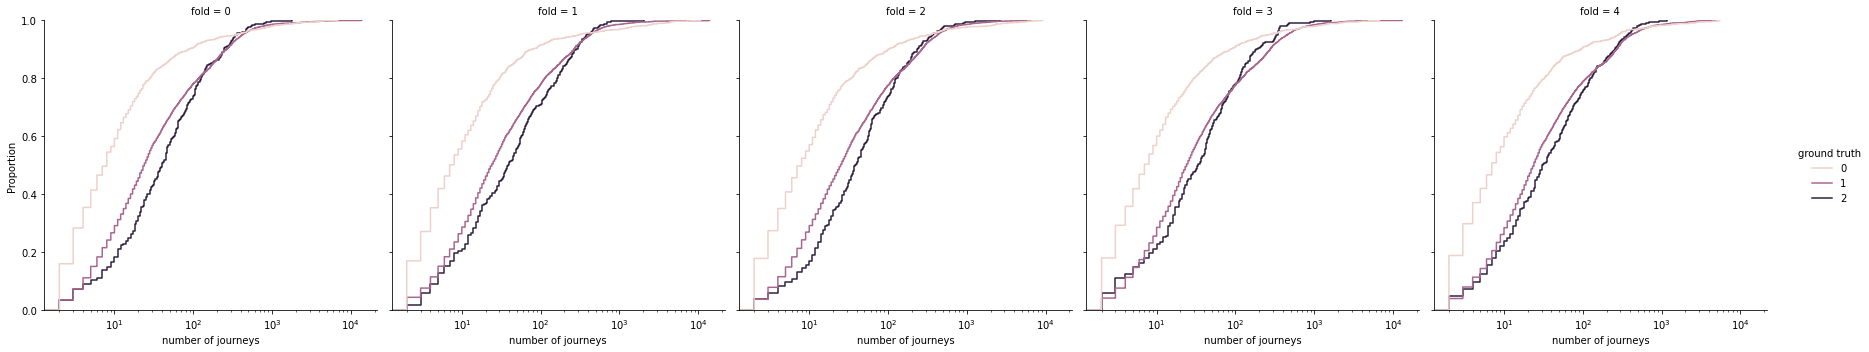

In [9]:
data = {'number of journeys': X[('number_of_journeys', 0)], 'fold': fold, 'ground truth': y}
sns.displot(data=pd.DataFrame(data), x='number of journeys', col='fold', hue='ground truth', log_scale=True, kind='ecdf')

# Feature: One node missing

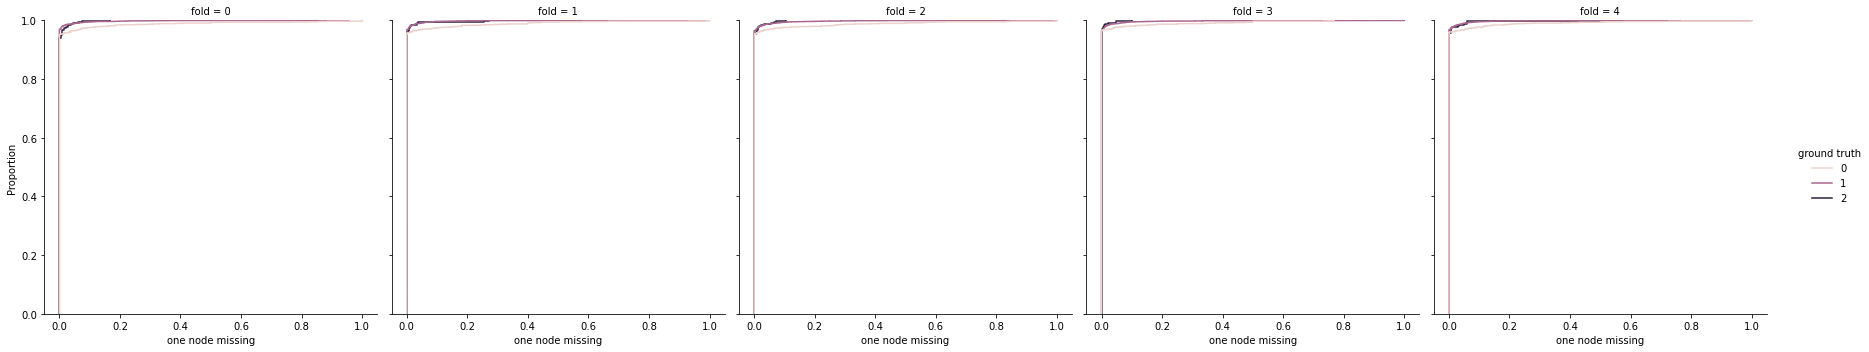

In [12]:
data = {'one node missing': X[('one_node_missing', 0)], 'fold': fold, 'ground truth': y}
sns.displot(data=pd.DataFrame(data), x='one node missing', col='fold', hue='ground truth', kind='ecdf')

# Feature: Both nodes missing

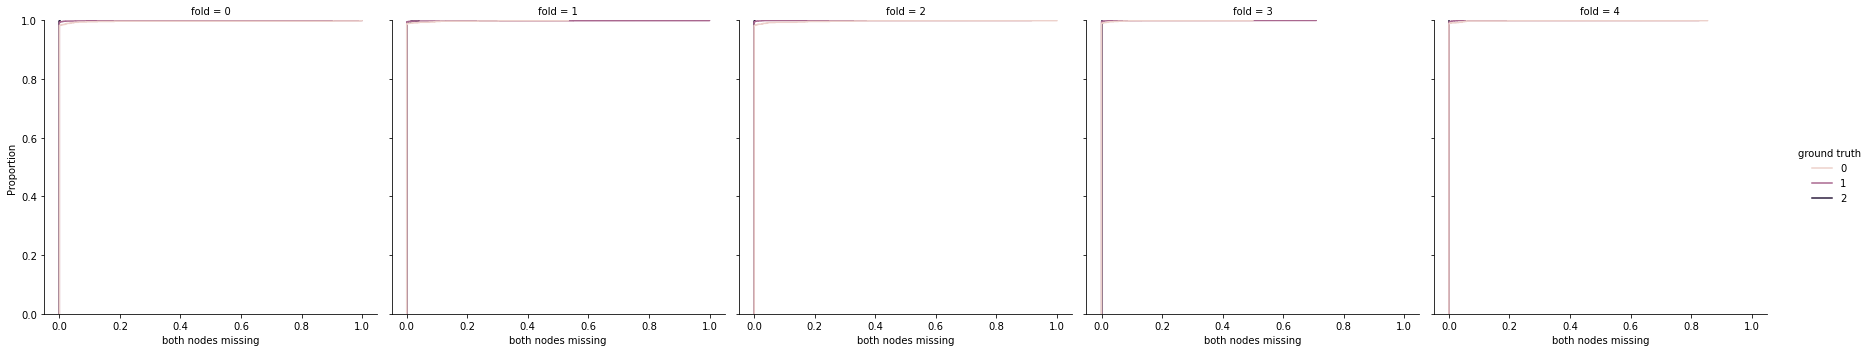

In [13]:
data = {'both nodes missing': X[('both_nodes_missing', 0)], 'fold': fold, 'ground truth': y}
sns.displot(data=pd.DataFrame(data), x='both nodes missing', col='fold', hue='ground truth', kind='ecdf')